### 1.1 Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.


### 1.2 Импорт необходимых библиотек

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', -1)

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

### 1.3 Приоритизация гипотез 

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### 1.3.1 Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Расчет фреймворка ICE проведем, используя формулу: 

$$ICE = \frac{Impact * Confidence}{Efforts}$$


In [4]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis','ICE']].sort_values(by = 'ICE', ascending = False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


#### Наиболее перспективные гипотезы по ICE: 8,0,7,6,2.

#### 1.3.2  Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Расчет фреймворка RICE проведем, используя формулу:

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$


In [5]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE',ascending = False).round(2)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


#### Наиболее перспективные гипотезы по RICE: 7,2,0,6,8.

#### Вывод:

#### Параметр Reach, использующийся в методе RICE изменил перспективность гипотез, полученную по методу ICE, только 6 и 4 гипотезы остались на прежних местах.

### 2.1 Анализ A/B-теста

#### 2.1.1 Предобработка данных

In [6]:
orders = pd.read_csv('/datasets/orders.csv')

display(orders.duplicated().sum())
display(orders.isna().mean())
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()
orders.head()

0

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.duplicated().sum()
orders.isna().mean()

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

In [8]:
display(orders.duplicated().sum(),
orders.isna().mean())

0

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

In [9]:
display(orders.duplicated().sum())
display(orders.isna().mean())

0

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

 Дубликатов и пропусков в таблице orders нет

In [10]:
visitors = pd.read_csv('/datasets/visitors.csv')

display(visitors.duplicated().sum())
display(visitors.isna().mean())
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()
visitors.head()

0

date        0.0
group       0.0
visitors    0.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Дубликатов и пропусков в таблице visitors нет

#### Вывод: 

#### Дубликатов и пропусков в таблицах orders и visitors нет

#### 2.1.2 Проверка  пользователей, которые оказались в обеих группах одновременно

In [11]:
t = orders.groupby('visitorId').agg({'group':'nunique'})
t[t['group'] > 1].count()


group    58
dtype: int64

#### Вывод:

#### Есть 58 пользователей, которые находятся сразу в нескольких группах. Это ошибка, о которой нужно сообщить разработчикам чтобы они поправили систему распределения пользователей по группам.В этом проекте таких пользователей исключать не нужно.

#### 2.2.1 	Построим график кумулятивной выручки по группам

In [12]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [13]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 


ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [14]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [15]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [16]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


In [17]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [18]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

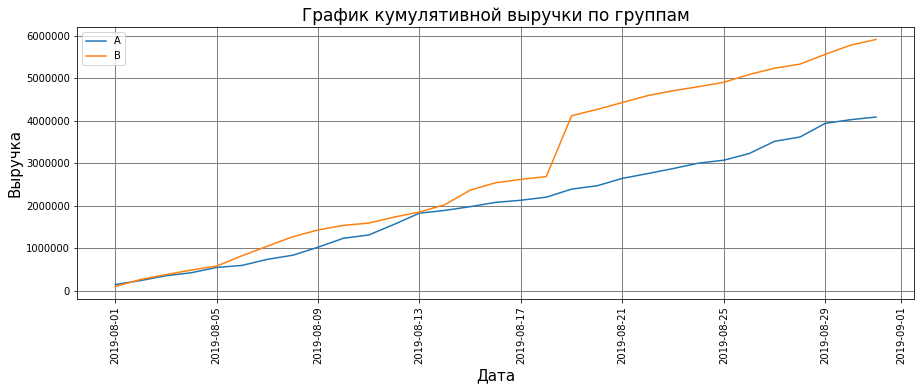

In [19]:
plt.figure(figsize = (15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам', fontsize = 17)
plt.xlabel("Дата", fontsize = 15)
plt.ylabel("Выручка", fontsize = 15)
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xticks(rotation= 90)
plt.legend()
plt.show()

#### Вывод:

#### В середине теста сегмент B вырвался вперед и лидировал весь остаток теста. Возможно это произошло из-за аномально больших заказов. Их будем удалять на заключительном этапе теста.

#### 2.2.2 	Построим график кумулятивного среднего чека по группам 

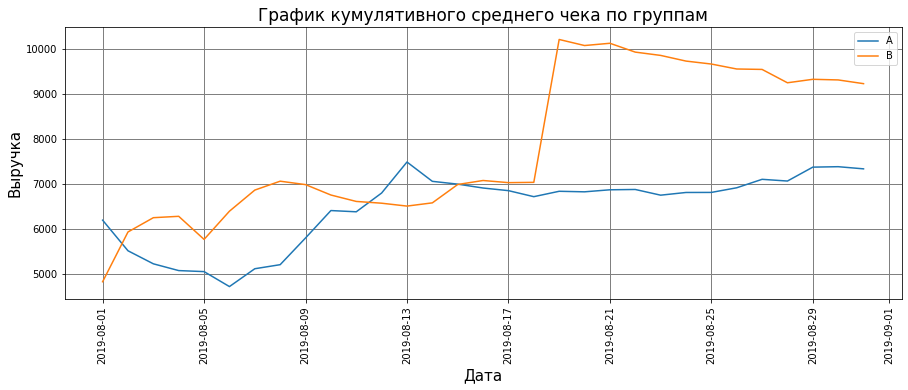

In [20]:
plt.figure(figsize = (15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам', fontsize = 17)
plt.xlabel("Дата", fontsize = 15)
plt.ylabel("Выручка", fontsize = 15)
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xticks(rotation= 90)
plt.legend()
plt.show()




####  Вывод:

#### Кумулятивное значение среднего чека по сегментам группы B стало больше чем у группы A. 

#### 2.2.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

In [21]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',
                                                   right_on='date', how='left', suffixes=['A', 'B'])


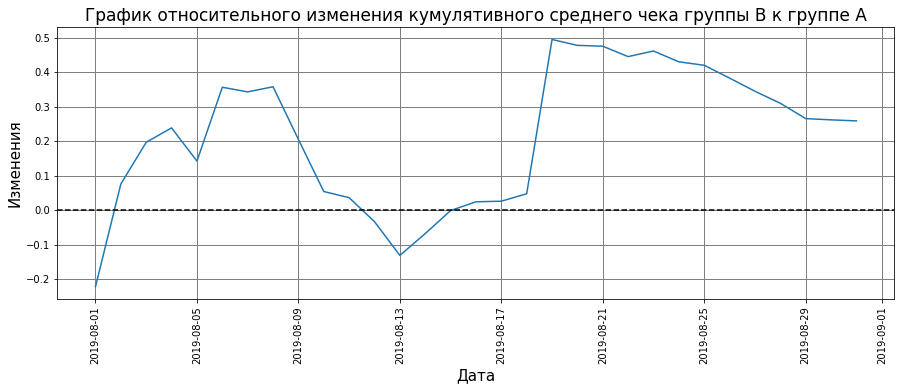

In [22]:
plt.figure(figsize = (15,5))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize = 17)
plt.xlabel("Дата", fontsize = 15)
plt.ylabel("Изменения", fontsize = 15)
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xticks(rotation= 90)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

#### Вывод:

#### График относительного различия в среднем чеке между группами. Результаты теста значительно и резко изменялись в некоторые из дат. Вероятно, в эти даты и были сделаны покупки с аномальной стоимостью.

#### 2.2.4	Построим график кумулятивной конверсии по группам

In [23]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

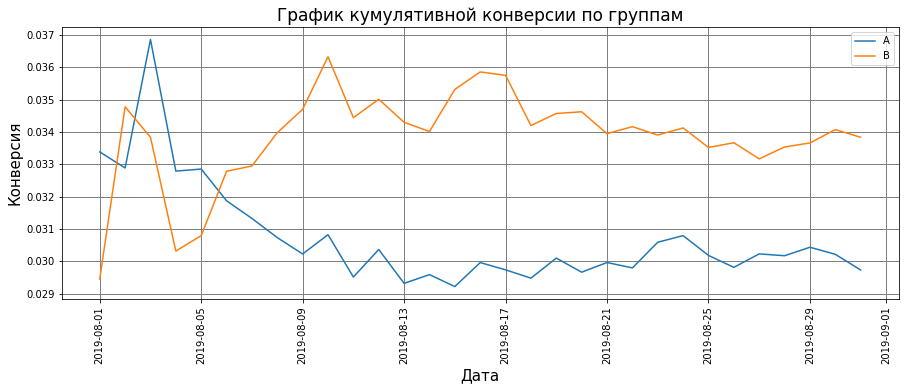

In [24]:
plt.figure(figsize = (15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам', fontsize = 17)
plt.xlabel("Дата", fontsize = 15)
plt.ylabel("Конверсия", fontsize = 15)
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xticks(rotation= 90)
plt.legend()
plt.show()


####  Вывод:

#### В начале сегмент A имел большую конверсию, потом значение конверсии сегмента B стало больше значения конверсии сегмента A.

#### 2.2.5 Построим график относительного изменения кумулятивной конверсии группы B к группе A

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                             left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


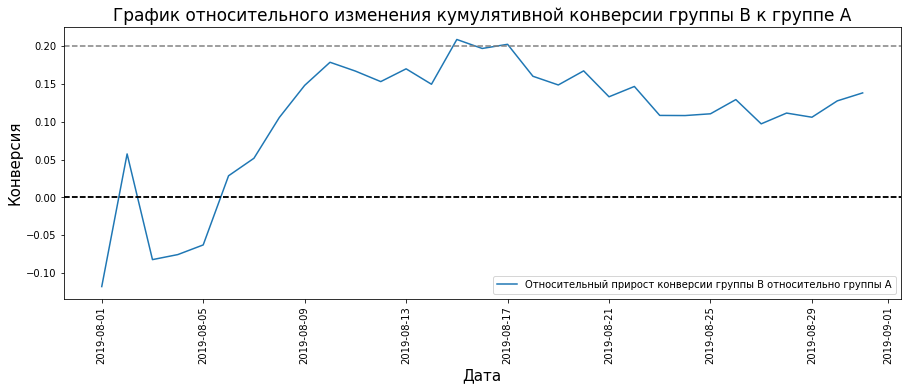

In [26]:
plt.figure(figsize = (15,5))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', fontsize = 17)
plt.xlabel("Дата", fontsize = 15)
plt.ylabel("Конверсия", fontsize = 15)
plt.xticks(rotation= 90)
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()



####  Вывод:

#### В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт.В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

#### 2.2.6 Построим точечный график количества заказов по пользователям

In [27]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head()

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


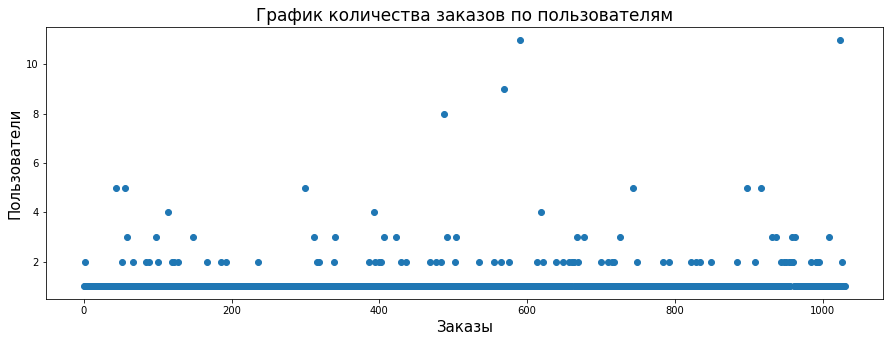

In [28]:
plt.figure(figsize = (15,5))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям', fontsize = 17)
plt.xlabel("Заказы", fontsize = 15)
plt.ylabel("Пользователи", fontsize = 15)
plt.show()

####  Вывод:

#### Пользователей, заказавших больше двух раз мало.Они могут быть аномалиями. Проверим это, посчитав перцентили.

#### 2.2.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя 

In [29]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

####  Вывод:

Не более 5% пользователей совершали больше 2 заказов.

Не более 1% пользователей совершали больше 4 заказов.

#### 2.2.8 Построим точечный график стоимостей заказов

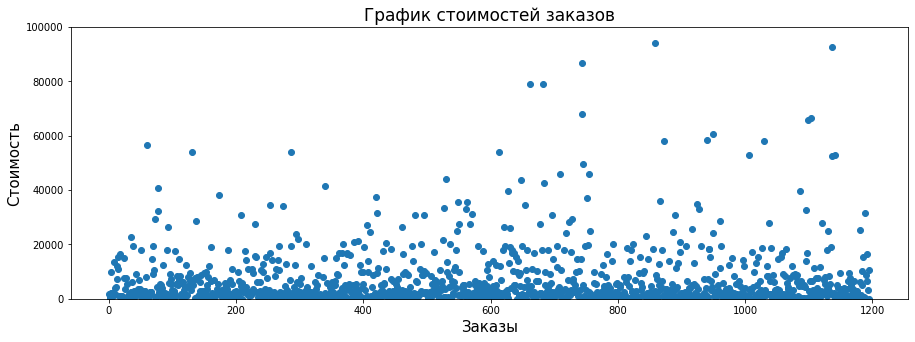

In [30]:
plt.figure(figsize = (15,5))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов', fontsize = 17)
plt.xlabel("Заказы", fontsize = 15)
plt.ylabel("Стоимость", fontsize = 15)
plt.ylim([0, 100000])
plt.show()

####  Вывод:

#### Заказов стоимостью выше 50000 рублей не очень много. Есть выбросы в районе 40000 рублей. Есть аномально огромный заказ больше 1200000 рублей. Посчитаем перцентили.

#### 2.2.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [31]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

####  Вывод:

Не более чем у 5 % заказов чек выше 28000 рублей.

Не более чем у 1 % заказов чек выше 58233 рублей.

#### 2.2.10 Посчитаем статистическую значимость различий в конверсии и в среднем чеке заказа между группами по «сырым» данным. 

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [33]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

In [34]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(2)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294


In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']


In [36]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [37]:
[ordersByUsersA['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [38]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

In [39]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [40]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [41]:
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#### Нулевая гипотеза: Cтатистически значимых различий в конверсии между группами нет

#### Альтернативная гипотеза: Cтатистически значимые различия в конверсии между группами есть

In [42]:
'P-value различий в конверсии между группами по «сырым» данным: {0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1])

'P-value различий в конверсии между группами по «сырым» данным: 0.00840'

In [43]:
"Отношения средних B/A по конверсии по «сырым» данным: {0:.3f}".format((data['ordersPerDateB'].sum()
                  /data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)

'Отношения средних B/A по конверсии по «сырым» данным: 0.138'

#### Вывод:

#### P-value 0.00840 значительно меньше 0.05. Следовательно нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет отвергаем. Из анализа 'сырых' данных видно, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 13.8 %

In [44]:
print("p-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

p-value: 0.00840


#### Нулевая гипотеза: Статистически значимых различий в среднем чеке между группами нет

#### Альтернативная гипотеза: Cтатистически значимые различия в среднем чеке между группами есть

In [45]:
'P-value различий в среднем чеке заказа между группами по «сырым» данным: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

'P-value различий в среднем чеке заказа между группами по «сырым» данным: 0.365'

In [46]:
'Отношения средних B/A по среднему чеку по «сырым» данным: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'Отношения средних B/A по среднему чеку по «сырым» данным: 0.259'

#### Вывод:

#### P-value 0.365 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. Относительное различие среднего чека между сегментами 25.9%.

#### 2.2.11 Посчитаем статистическую значимость различий в конверсии и в среднем чеке заказа между группами по «очищенным» данным. 

95-й и 99-й перцентили средних чеков равны 28000 и 58233 рубля.
 
95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя.

Примем за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 30 000 рублей.

In [47]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)

In [48]:
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [49]:
abnormalUsers.head()
abnormalUsers.shape

(57,)

#### Всего 57 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [50]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [51]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

#### Нулевая гипотеза: Cтатистически значимых различий в конверсии между группами нет

#### Альтернативная гипотеза: Cтатистически значимые различия в конверсии между группами есть

In [52]:
'P-value различий в конверсии между группами по «очищенным» данным: {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'P-value различий в конверсии между группами по «очищенным» данным: 0.00916'

In [53]:
'Отношения средних B/A по конверсии по «очищенным» данным: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'Отношения средних B/A по конверсии по «очищенным» данным: 0.148'

#### Вывод:

#### P-value 0.00916 меньше 0.05. Следовательно нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет отвергаем. Как и вслучае с сырыми данными статистическая значимость достигнута. Результаты конверсии практически не изменились. Сегмент B лучше сегмента A на 14.8%.

#### Нулевая гипотеза: Статистически значимых различий в среднем чеке между группами нет

#### Альтернативная гипотеза: Cтатистически значимые различия в среднем чеке между группами есть

In [54]:
'P-value различий в среднем чеке заказа между группами по «очищенным» данным: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )

'P-value различий в среднем чеке заказа между группами по «очищенным» данным: 0.479'

In [55]:
"Отношения средних B/A по среднему чеку по «очищенным» данным: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )

'Отношения средних B/A по среднему чеку по «очищенным» данным: -0.020'

#### Вывод:

#### P-value увеличился c 0.365 до 0.479. Что по-прежнему больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. но и разница между сегментами сократилась с 25.9% до 2%.Хотя общие выводы по результатам теста не изменились, такой пример хорошо показывает, как сильно аномалии могут влиять на результаты A/B-теста.

#### 2.2.12 Общий вывод по результатам теста:

•	Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

•	Как по сырым данным так и после фильтрации аномалий есть статистически значимое различие по среднему чеку между группами.

•	График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту.

•	График различия среднего чека колеблется: он-то и позволил задуматься и найти аномалии. 

Т.о. исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Результаты группы B лучше группы A.